# 03. PyTorch Computer Vision

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluting model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictons on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

In [37]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## 1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [38]:
# Train data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data, False: Get test data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)
# Test data
test_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=False, # get training data, False: Get test data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

device = "mps" if torch.backends.mps.is_available() else "cpu"

In [4]:
# Something
train_data.targets # Bütün elemanların labellarını barındıran bir tensor döner

# See first training sample
train_data[0]   # Data ve label'ı içinde barındıran iki elamanı olan bir tuple döner
image, label = train_data[0] # image=data, label=label


In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [39]:
# See classes
class_names = train_data.classes
print(class_names) # It is also idx to class -> class_names[1] = 'Trouser
# Class to index
cls_to_idx = train_data.class_to_idx
print(cls_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


### 1.2 Visualizing our data

torch.Size([1, 28, 28])


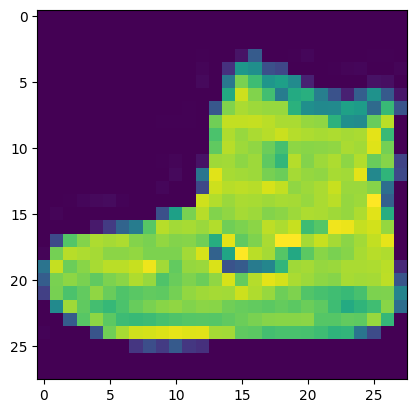

In [5]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())  # 2D olmaz ise görseli göremiyoruz

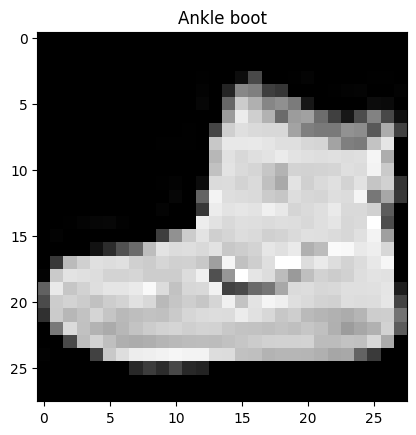

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

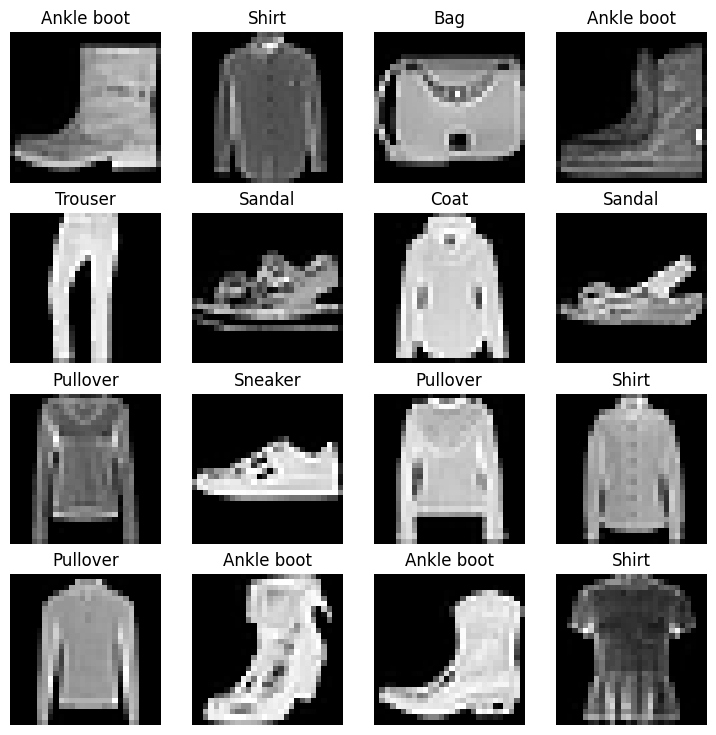

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

In [40]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,  # dataset to turn into iterable
    batch_size=BATCH_SIZE,  # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x28af80890>, <torch.utils.data.dataloader.DataLoader object at 0x17f1cac60>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [8]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Dataloader'ın her bir elemanı iki elemanı bulunan bir tuple.

İlk eleman batch, ikinci eleman o batch içerisindeki her bir sample'ın label'ı

Bir batch belirlediğimiz sayıda (BATCH_SIZE) image verisini içinde tutar.

Batch içerisindeki her elemanın(image) 0.indexi elemanın batch içerisindeki index'i olur.

Her elemanın(image) kalan 3 index'i ise kendi orjinal değerleridir.

iter() fonksiyonu ile iterable obje oluşturulur.

Bu obje ile her elemana direkt olarak erişemeyiz ama next() fonksiyonu ve for döngüsü ile elemanlara erişim mümkündür

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


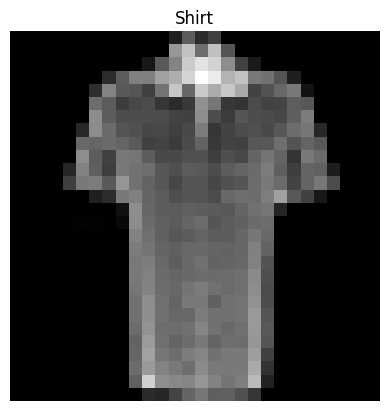

In [12]:
# Show a sample from first batch
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

There's going to one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

In [28]:
import torch
from torch import nn


class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(in_features=input_shape, out_features=hidden_units)
        self.linear2 = nn.Linear(in_features=hidden_units, out_features=output_shape)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out = self.flatten(x)
        out = self.linear1(out)
        out = self.linear2(out)
        return out

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

In [29]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to(device)

FashionMNISTModelV0(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
)

### 3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) and subsequently the `accuracy_fn()` we defined in [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/).

> **Note:** Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the [TorchMetrics package](https://torchmetrics.readthedocs.io/en/latest/).

In [14]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [49]:
# Import accuracy metric
from torchmetrics import Accuracy
accuracy = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.3 Creating a training loop and training a model on batches of data

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader. 

Let's step through it: 
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.

In [16]:
# Using tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
    train_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        
        X = X.to(device)
        y = y.to(device)
        
        # Training
        model_0.train()
        # Forward pass
        y_pred = model_0(X)
        # Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate loss per batch
        # Zero the gradients
        optimizer.zero_grad()
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()
        # Print loss every 400 batches
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    # Loss per epoch    
    train_loss = train_loss / len(train_dataloader)
    
    ## Testing
    test_loss = 0
    # Set model to evaluation mode
    model_0.eval()
    # Turn off gradients
    with torch.inference_mode():
        for X, y in test_dataloader:
            # Move data to device
            X = X.to(device)
            y = y.to(device)
            # Forward pass
            test_pred = model_0(X)
            # Calculate loss per batch
            test_loss += loss_fn(test_pred, y)
            # Update accuracy
            accuracy.update(test_pred, y)
    # Loss per epoch        
    test_loss = test_loss / len(test_dataloader)
    # Calculate accuracy
    test_acc = accuracy.compute()
    # Print loss and accuracy per epoch
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


/Users/aliyilmaz/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:05<00:10,  5.28s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 0.82%

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:10<00:05,  5.16s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 0.83%

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:15<00:00,  5.11s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 0.83%



### 6.2 Functionizing training and test loops

So far we've been writing train and test loops over and over. 

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.


In [41]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    
    for batch, (X, y) in enumerate(data_loader):
        
        X = X.to(device)
        y = y.to(device)
        
        # Training
        model.train()
        # Forward pass
        y_pred = model(X)
        # Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate loss per batch
        # Update accuracy
        accuracy.update(y_pred, y)
        # Zero the gradients
        optimizer.zero_grad()
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()
        # Print loss every 400 batches
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    # Loss per epoch    
    train_loss = train_loss / len(train_dataloader)
    train_acc = accuracy.compute()
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy,
              device: torch.device = device):
    
    ## Testing
    test_loss, test_acc = 0, 0
    # Set model to evaluation mode
    model.eval()
    # Turn off gradients
    with torch.inference_mode():
        for X, y in data_loader:
            # Move data to device
            X = X.to(device)
            y = y.to(device)
            # Forward pass
            test_pred = model(X)
            # Calculate loss per batch
            test_loss += loss_fn(test_pred, y)
            # Update accuracy
            accuracy.update(test_pred, y)
    # Loss per epoch        
    test_loss = test_loss / len(test_dataloader)
    # Calculate accuracy
    test_acc = accuracy.compute()
    # Print loss and accuracy per epoch
    print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

### 6.4 Train data with functions

In [31]:
# Using tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
    
    print(f"Epoch: {epoch}\n---------")
    
    train_step(data_loader=train_dataloader, 
        model=model_0, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy=accuracy)
    
    test_step(data_loader=test_dataloader,
        model=model_0,
        loss_fn=loss_fn,
        accuracy=accuracy)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59039 | Train accuracy: 0.79%


 33%|███▎      | 1/3 [00:07<00:14,  7.11s/it]

Test loss: 0.50954, Test acc: 0.80%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47633 | Train accuracy: 0.81%


 67%|██████▋   | 2/3 [00:13<00:06,  6.87s/it]

Test loss: 0.47989, Test acc: 0.81%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45503 | Train accuracy: 0.82%


100%|██████████| 3/3 [00:20<00:00,  6.90s/it]

Test loss: 0.47664, Test acc: 0.82%



### 6.2 Evaluation function


In [48]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            accuracy.update(y_pred, y)        
        # Scale loss and acc
        loss /= len(data_loader)
        acc = accuracy.compute()
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [51]:
eval_dict = eval_model(model_0,
                       test_dataloader,
                       loss_fn,
                       accuracy,
                       device)
print(eval_dict)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4766390025615692, 'model_acc': tensor(0.8341, device='mps:0')}


## 7. Model 2: Building a Convolutional Neural Network (CNN)

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements. 

Let's build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.

In [42]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
        # 28x28 -> Conv2d (3x3) -> 28x28 -> MaxPool2d (2x2) -> 14x14
        # 14x14 -> Conv2d (3x3) -> 14x14 -> MaxPool2d (2x2) -> 7x7
        # Conv2D did not change shape of the tensor because of the padding. Padding adds extra pixels around the input image so the kernel can move over the input without changing the shape of the input.
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,  # Number of channels in the input data since first layer is a convolutional layer
                              hidden_units=10, 
                              output_shape=len(class_names)).to(device) 
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through `nn.Conv2d()` and `nn.MaxPool2d()`

We could start using our model above and see what happens but let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

In [21]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]


In [22]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# (input_shape - kernel_size + 2*padding)/stride + 1

# Pass the data through the convolutional layer
conv_layer(test_image).shape # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 
conv_layer(test_image.unsqueeze(dim=0)).shape # add an extra dimension to the beginning of the tensor to make it 4d


torch.Size([1, 10, 62, 62])

Image shape after convolution: [batch_size, out_channels, new_height, new_width]

Image height and width formula: (input_shape - kernel_size + 2*padding)/stride + 1

(64 - 3 + 2*0)/1 + 1 = 62



In [23]:
# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


MaxPool2d takes the maximum value from each window area in the input tensor according to the specified window size, thereby reducing its dimensions. This process reduces the height and width dimensions of the tensor while maintaining its depth

### 7.3 Setup a loss function and optimizer for `model_2`



In [43]:
loss_fn_cnn = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.SGD(model_2.parameters(), lr=0.1)
accuracy_cnn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)



### 7.4 Training and testing `model_2` using our training and test functions

In [45]:
torch.manual_seed(42)

epochs = 3

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn_cnn,
        optimizer=optimizer_cnn,
        accuracy=accuracy_cnn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn_cnn,
        accuracy=accuracy_cnn,
        device=device
    )

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.30493 | Train accuracy: 0.86%
Test loss: 0.31236, Test acc: 0.86%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.29074 | Train accuracy: 0.86%
Test loss: 0.30085, Test acc: 0.87%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.27822 | Train accuracy: 0.87%
Test loss: 0.30710, Test acc: 0.87%



In [52]:
eval_dict_cnn = eval_model(model_2,
                       test_dataloader,
                       loss_fn_cnn,
                       accuracy_cnn,
                       device)
print(eval_dict_cnn)

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.3070972263813019, 'model_acc': tensor(0.8715, device='mps:0')}


## 9. Make and evaluate random predictions with best model

Create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [88]:
def make_predictions(model: torch.nn.Module, data: list, device: str = device):
    pred_classes = []
    model.eval()
    for sample in data:
        # Move data to device
        sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
        # Why we need to add an extra dimension? Because the model expects a 4-dimensional tensor (batch_size, color_channels, height, width)

        # Forward pass (model outputs raw logit)
        pred_logit = model(sample)

        # Get prediction probability (logit -> prediction probability)
        pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

        # Get pred_prob off GPU for further calculations
        #pred_probs.append(torch.stack(pred_prob.cpu()))
      
        # Get predicted class
        #pred_class = pred_prob.argmax(dim=0)
        pred_classes.append(pred_prob.argmax(dim=0).cpu().item())
    return pred_classes    
    

    #return torch.stack(pred_classes)
    

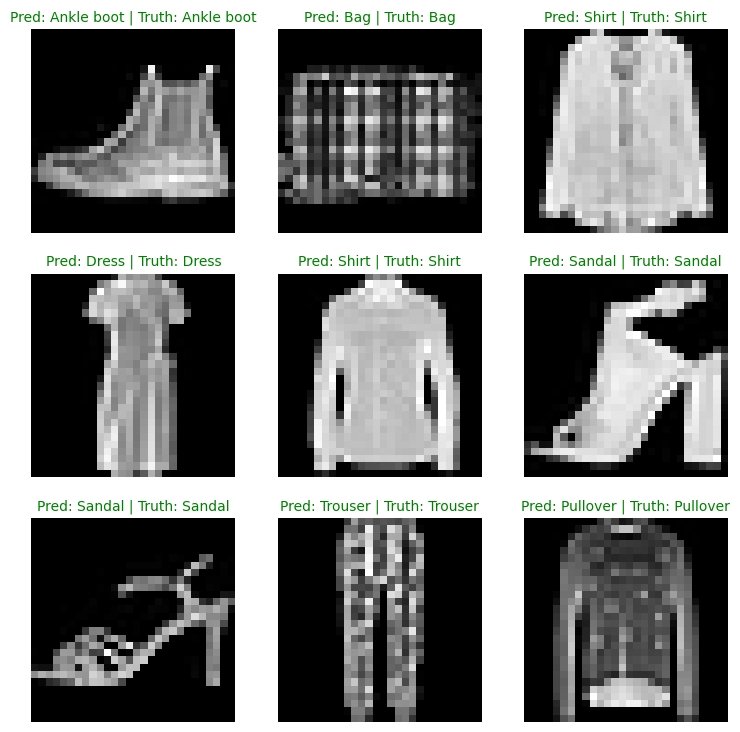

In [107]:
# Get random 9 samples from test_data in a list
torch.manual_seed(42)
test_sample, test_labels = zip(*[(test_data[i][0], test_data[i][1]) for i in torch.randint(0, len(test_data), (9,))])

# Make predictions
preds = make_predictions(model_2, test_sample, device)
preds

# Get the label names from preds
pred_classes = [class_names[pred] for pred in preds]
true_classes = [class_names[label] for label in test_labels]

# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_class = pred_classes[i]
  true_class = true_classes[i]
    
  # Create the title text of the plot
  title_text = f"Pred: {pred_class} | Truth: {true_class}"
  
  # Check for equality and change title colour accordingly
  if pred_class == true_class:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);


## 10. Making a confusion matrix for further prediction evaluation

First, making predictions.

In [108]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:00<00:00, 423.92it/s]


`torchmetrics` and `mlxtend` installed, let's make a confusion matrix!

First we'll create a `torchmetrics.ConfusionMatrix` instance telling it how many classes we're dealing with by setting `num_classes=len(class_names)`.

Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions (`preds=y_pred_tensor`) and targets (`target=test_data.targets`).

Finally we can plot our confision matrix using the `plot_confusion_matrix()` function from `mlxtend.plotting`.

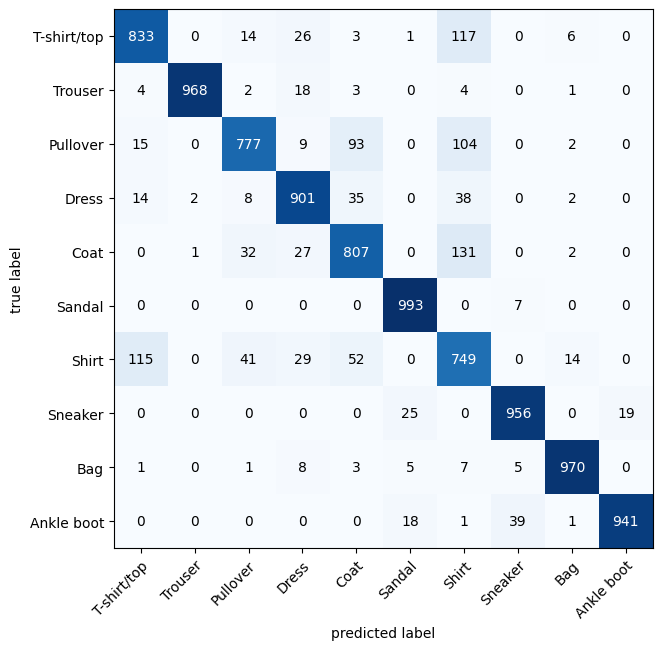

In [109]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 11. Save and load best performing model

* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`. 
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

PyTorch saving and loading models documentation (https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly. 

In [110]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [113]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [114]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn_cnn, 
    accuracy=accuracy_cnn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3070972263813019,
 'model_acc': tensor(0.8719, device='mps:0')}